# CÃ¡lculo de la saturaciÃ³n de oxÃ­geno a partir de los datos crudos del sensor

## 1. CorrecciÃ³n de las seÃ±ales (eliminar la luz ambiental)
En el firmware del pulsioxÃ­metro, generalmente se resta la luz ambiental a la seÃ±al principal, es decir:

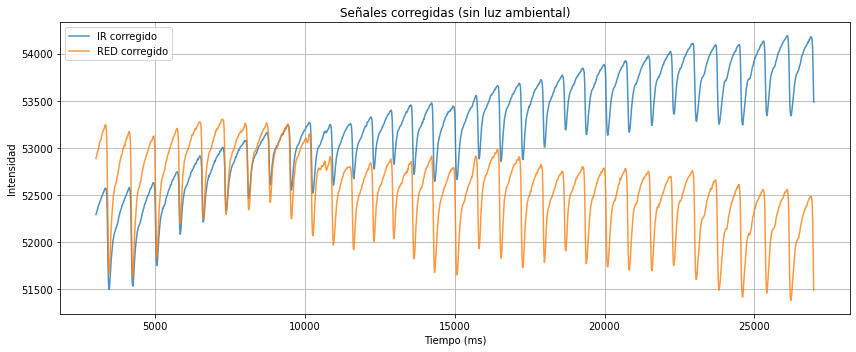

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo CSV
file_path = r"C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Datos crudos\save_log2\raw_data_95_77_2.csv"

# Cargar datos
data = pd.read_csv(file_path, delimiter=';')

# Recorte de los primeros y Ãºltimos 3 segundos
t_min = data["Tiempo (ms)"].min()
t_max = data["Tiempo (ms)"].max()
data = data[(data["Tiempo (ms)"] >= t_min + 3000) & (data["Tiempo (ms)"] <= t_max - 3000)].reset_index(drop=True)

# CorrecciÃ³n de luz ambiental
data['IR_corr'] = data['IR'] - data['AMB_IR']
data['RED_corr'] = data['RED'] - data['AMB_RED']

# VisualizaciÃ³n de las seÃ±ales corregidas
plt.figure(figsize=(12, 5))
plt.plot(data['Tiempo (ms)'], data['IR_corr'], label='IR corregido', alpha=0.8)
plt.plot(data['Tiempo (ms)'], data['RED_corr'], label='RED corregido', alpha=0.8)
plt.xlabel("Tiempo (ms)")
plt.ylabel("Intensidad")
plt.title("SeÃ±ales corregidas (sin luz ambiental)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Filtrado de seÃ±ales

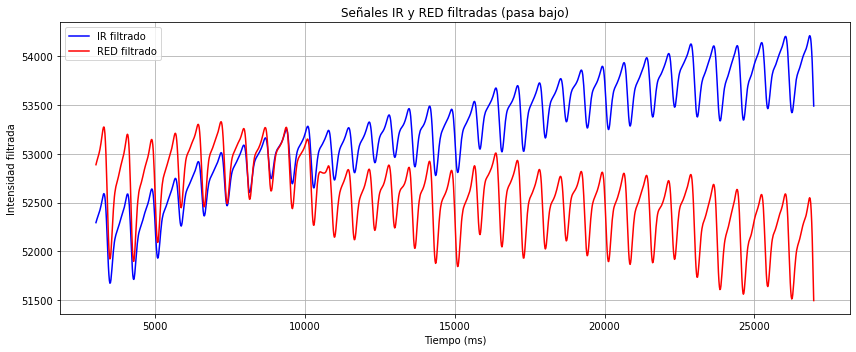

In [2]:
from scipy.signal import butter, filtfilt

# Frecuencia de muestreo estimada (en Hz)
# Asumimos que el muestreo es cada 16 ms (segÃºn el firmware)
fs = 1000 / 16  # â‰ˆ 62.5 Hz

# Crear filtro Butterworth paso bajo (orden 3, frecuencia de corte 4 Hz)
def butter_lowpass_filter(signal, cutoff=4, fs=fs, order=3):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered = filtfilt(b, a, signal)
    return filtered

# Aplicar filtro a las seÃ±ales corregidas
data['IR_filt'] = butter_lowpass_filter(data['IR_corr'])
data['RED_filt'] = butter_lowpass_filter(data['RED_corr'])

# Visualizar las seÃ±ales filtradas
plt.figure(figsize=(12, 5))
plt.plot(data['Tiempo (ms)'], data['IR_filt'], label='IR filtrado', color='blue')
plt.plot(data['Tiempo (ms)'], data['RED_filt'], label='RED filtrado', color='red')
plt.xlabel("Tiempo (ms)")
plt.ylabel("Intensidad filtrada")
plt.title("SeÃ±ales IR y RED filtradas (paso bajo)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## CÃ¡lculo del ratio R y estimaciÃ³n de SpOâ‚‚:
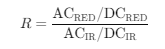
Y a partir de ahÃ­, aplicar la fÃ³rmula empÃ­rica que usa el firmware, por ejemplo: SpOâ‚‚=104âˆ’17â‹…R

In [4]:
import numpy as np

# Componente DC: media
dc_ir = np.mean(data['IR_filt'])
dc_red = np.mean(data['RED_filt'])

# Componente AC: desviaciÃ³n tÃ­pica (std)
ac_ir = np.std(data['IR_filt'])
ac_red = np.std(data['RED_filt'])

# Ratio R
R = (ac_red / dc_red) / (ac_ir / dc_ir)

# FÃ³rmula empÃ­rica (basada en el firmware)
spo2 = 104 - 17 * R

# === Mostrar resultado ===
print(f"SpOâ‚‚ estimada: {spo2:.2f}%")

SpOâ‚‚ estimada: 91.89%



ðŸ“„ Procesando archivo: raw_data_91_91.csv
ðŸ©º SpOâ‚‚ estimada: 98.02%


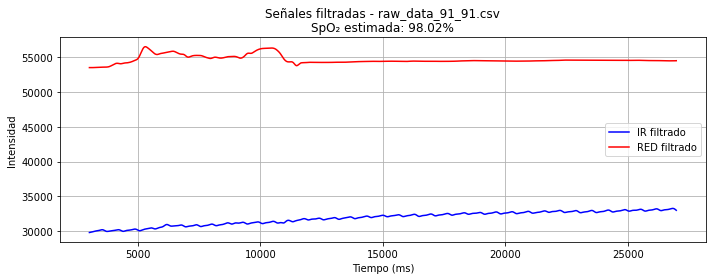


ðŸ“„ Procesando archivo: raw_data_92_76.csv
ðŸ©º SpOâ‚‚ estimada: -92.39%


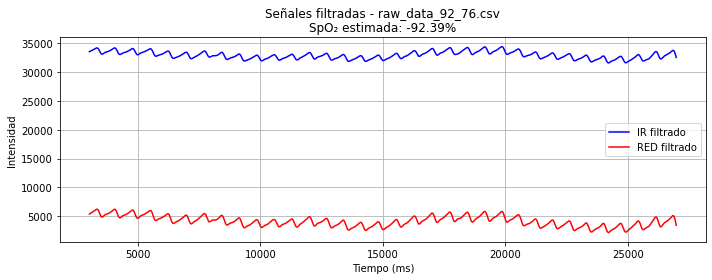


ðŸ“„ Procesando archivo: raw_data_93_100.csv
ðŸ©º SpOâ‚‚ estimada: 104.39%


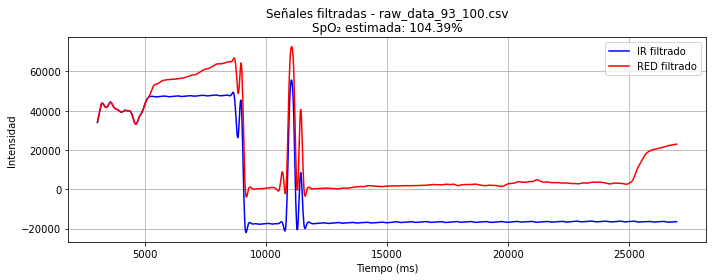


ðŸ“„ Procesando archivo: raw_data_95_77_2.csv
ðŸ©º SpOâ‚‚ estimada: 91.89%


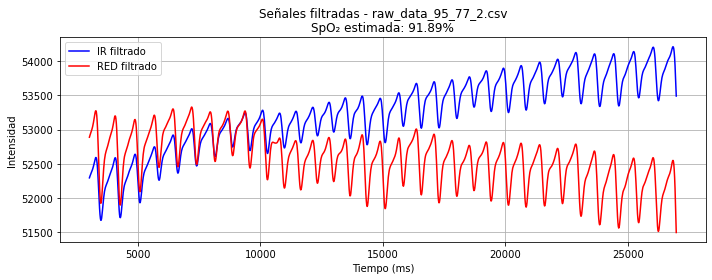


ðŸ“„ Procesando archivo: raw_data_95_80.csv
ðŸ©º SpOâ‚‚ estimada: 63.36%


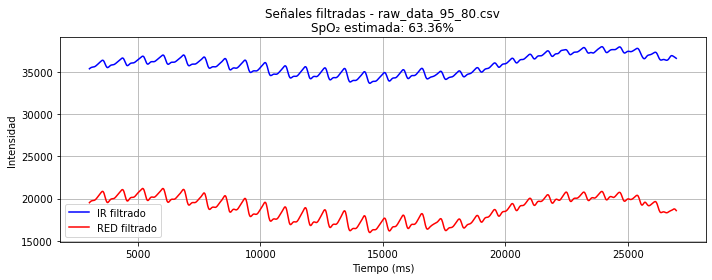


ðŸ“„ Procesando archivo: raw_data_95_81_papa.csv
ðŸ©º SpOâ‚‚ estimada: 93.84%



ðŸ“„ Procesando archivo: raw_data_95_99.csv
ðŸ©º SpOâ‚‚ estimada: 72.73%


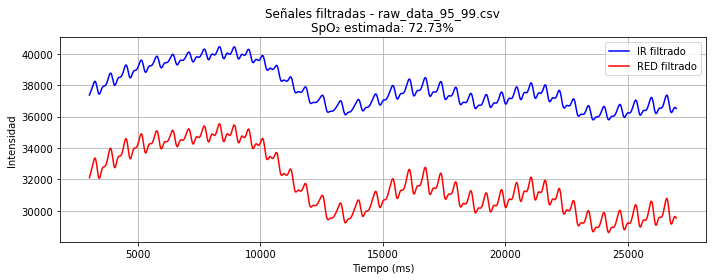


ðŸ“„ Procesando archivo: raw_data_96_106.csv
ðŸ©º SpOâ‚‚ estimada: 91.53%



ðŸ“„ Procesando archivo: raw_data_96_69.csv
ðŸ©º SpOâ‚‚ estimada: 89.05%


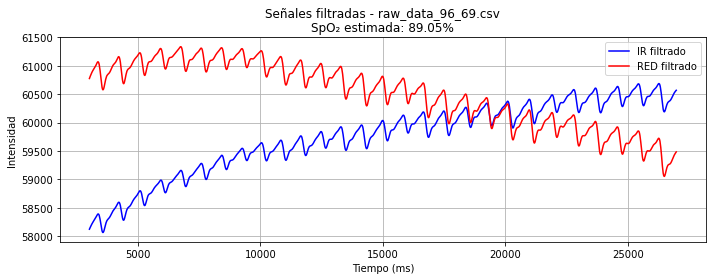


ðŸ“„ Procesando archivo: raw_data_97_119.csv
ðŸ©º SpOâ‚‚ estimada: 90.93%



ðŸ“„ Procesando archivo: raw_data_97_95.csv
ðŸ©º SpOâ‚‚ estimada: -938.22%


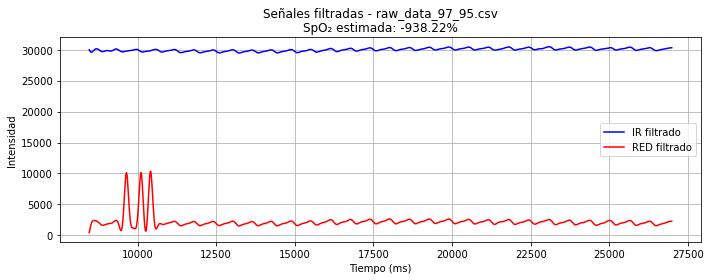


ðŸ“„ Procesando archivo: raw_data_98_81.csv
ðŸ©º SpOâ‚‚ estimada: 97.67%


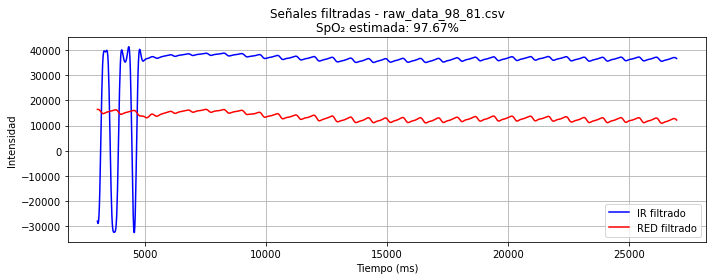


ðŸ“„ Procesando archivo: raw_data_98_86.csv
ðŸ©º SpOâ‚‚ estimada: 533.70%


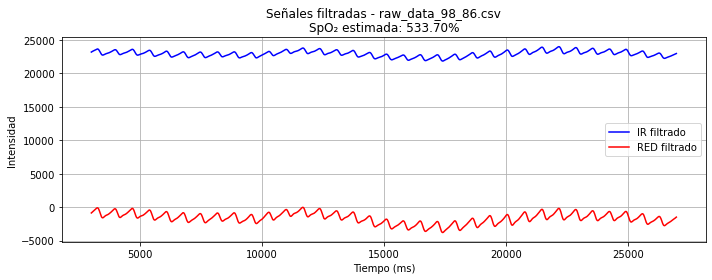


ðŸ“„ Procesando archivo: raw_data_98_91.csv
ðŸ©º SpOâ‚‚ estimada: 89.10%


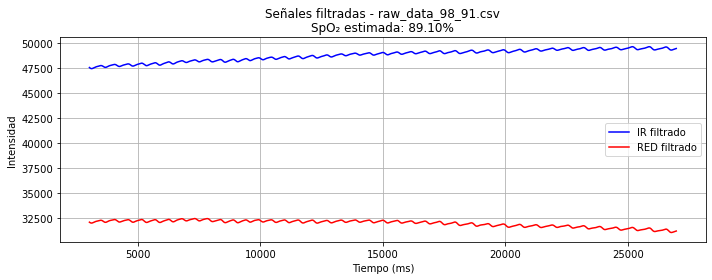


ðŸ“„ Procesando archivo: raw_data_99_75.csv
ðŸ©º SpOâ‚‚ estimada: 62.88%


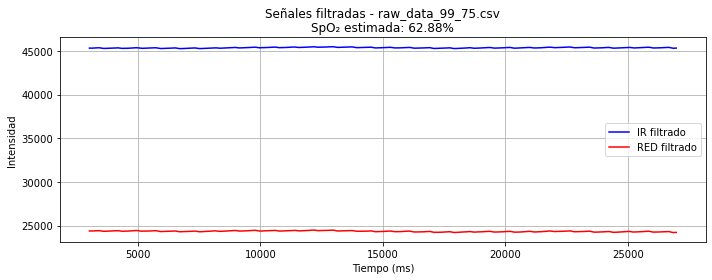


ðŸ“„ Procesando archivo: raw_data_99_91.csv
ðŸ©º SpOâ‚‚ estimada: 76.07%


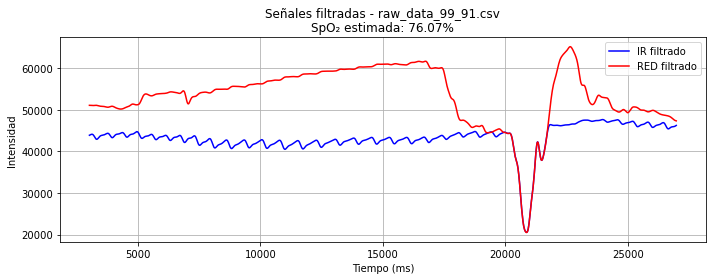

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# === CONFIGURACIÃ“N GENERAL ===
carpeta = r"C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Datos crudos\save_log2"
fs = 1000 / 16  # â‰ˆ 62.5 Hz

# === FunciÃ³n de filtrado pasa bajo Butterworth ===
def butter_lowpass_filter(signal, cutoff=4, fs=fs, order=3):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, signal)

# === Procesar todos los archivos CSV en la carpeta ===
for archivo in os.listdir(carpeta):
    if archivo.endswith(".csv"):
        ruta_completa = os.path.join(carpeta, archivo)
        print(f"\n Procesando archivo: {archivo}")
        
        # Cargar datos
        data = pd.read_csv(ruta_completa, delimiter=';')

        # Recorte de extremos (3 s)
        t_min = data["Tiempo (ms)"].min()
        t_max = data["Tiempo (ms)"].max()
        data = data[(data["Tiempo (ms)"] >= t_min + 3000) & (data["Tiempo (ms)"] <= t_max - 3000)].reset_index(drop=True)

        # CorrecciÃ³n luz ambiental
        data['IR_corr'] = data['IR'] - data['AMB_IR']
        data['RED_corr'] = data['RED'] - data['AMB_RED']

        # Filtro pasa bajo
        data['IR_filt'] = butter_lowpass_filter(data['IR_corr'])
        data['RED_filt'] = butter_lowpass_filter(data['RED_corr'])

        # CÃ¡lculo de AC y DC
        dc_ir = np.mean(data['IR_filt'])
        dc_red = np.mean(data['RED_filt'])
        ac_ir = np.std(data['IR_filt'])
        ac_red = np.std(data['RED_filt'])

        # Ratio y SpO2
        R = (ac_red / dc_red) / (ac_ir / dc_ir)
        spo2 = 104 - 17 * R

        # Mostrar resultado
        print(f" SpOâ‚‚ estimada: {spo2:.2f}%")

        # Mostrar grÃ¡fica
        plt.figure(figsize=(10, 4))
        plt.plot(data['Tiempo (ms)'], data['IR_filt'], label='IR filtrado', color='blue')
        plt.plot(data['Tiempo (ms)'], data['RED_filt'], label='RED filtrado', color='red')
        plt.title(f"SeÃ±ales filtradas - {archivo}\nSpOâ‚‚ estimada: {spo2:.2f}%")
        plt.xlabel("Tiempo (ms)")
        plt.ylabel("Intensidad")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


# ExplicaciÃ³n

El pulsioxÃ­metro mide la saturaciÃ³n de oxÃ­geno en sangre (SpOâ‚‚), es decir, quÃ© porcentaje de hemoglobina en la sangre estÃ¡ cargada con oxÃ­geno.

La hemoglobina tiene dos formas relevantes:

- HbOâ‚‚ (oxihemoglobina): transporta oxÃ­geno.

- Hb (desoxihemoglobina): no transporta oxÃ­geno.

Ambas absorben la luz de manera distinta:

- La **Luz roja (~660 nm)** es mÃ¡s absorbida por la **Hb (desoxihemoglobina)**
- La **Luz infrarroja (IR) (~940 nm)** es mÃ¡s absorbida por la **HbOâ‚‚ (oxihemoglobina)**

El sensor emite luz en dos longitudes de onda: roja y IR. Un fotodiodo mide cuÃ¡nto se absorbe de cada una. Esa absorciÃ³n varÃ­a con cada latido, porque los vasos se expanden con sangre oxigenada y luego se vacÃ­an.

Por eso las seÃ±ales de IR y RED son pulsÃ¡tiles: los picos representan los latidos, y su variaciÃ³n es proporcional a la cantidad de sangre y oxÃ­geno.

### Â¿CÃ³mo se estima SpOâ‚‚?
#### 1. CorrecciÃ³n de luz ambiental
Primero restamos la luz "ambiente" (valores de AMB_IR y AMB_RED) para quedarnos con la seÃ±al real de absorciÃ³n por el dedo del bebÃ© (o en mi caso, la mÃ­a para validar):\
IR_corr = IR - AMB_IR\
RED_corr = RED - AMB_RED


#### 2. Filtrado paso bajo
La seÃ±al tiene ruido (del sensor, del movimiento, interferencias). Aunque previamente hemos quitado los primeros y Ãºltimos 3 segundos, aplicamos un **filtro paso bajo** para dejar solo la parte pulsÃ¡til (â‰¤ 4 Hz, porque un corazÃ³n normal late entre 0.5 y 3 Hz).

Esto suaviza la seÃ±al y deja solo la parte fisiolÃ³gica Ãºtil:\
IR_filt = butter_lowpass_filter(IR_corr)\
RED_filt = butter_lowpass_filter(RED_corr)


#### 3. SeparaciÃ³n en componentes AC y DC
Cada seÃ±al tiene dos componentes:

**DC (Direct Current)** â†’ La media: representa la absorciÃ³n constante (tejido, piel, hueso).

**AC (Alternating Current)** â†’ La oscilaciÃ³n: representa los latidos y el paso de sangre oxigenada.

El cociente AC/DC elimina variaciones por piel gruesa, presiÃ³n del sensor, etc.
 
Por eso calculamos:

dc_ir = np.mean(IR_filt)\
ac_ir = np.std(IR_filt)\

dc_red = np.mean(RED_filt)\
ac_red = np.std(RED_filt)\

#### 4. CÃ¡lculo del ratio R

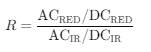

Este ratio compara cÃ³mo se comporta la luz roja (mÃ¡s absorbida por sangre sin oxÃ­geno) respecto a la IR (mÃ¡s absorbida por sangre con oxÃ­geno).

Si R es alto â†’ hay mÃ¡s Hb â†’ baja SpOâ‚‚

Si R es bajo â†’ hay mÃ¡s HbOâ‚‚ â†’ alta SpOâ‚‚

####  5. EstimaciÃ³n empÃ­rica de SpOâ‚‚
El firmware original usa una fÃ³rmula basada en calibraciÃ³n con personas sanas (no es una ley fÃ­sica, sino una aproximaciÃ³n experimental vÃ¡lida para valores tÃ­picos (de 70% a 100%).

SpOâ‚‚=104âˆ’17â‹…R


#### CSV â†’ Eliminar extremos â†’ Corregir luz ambiental â†’ Filtrar seÃ±ales â†’ Separar AC/DC â†’ Calcular ratio R â†’ Estimar SpOâ‚‚ â†’ Visualizar/guardar